In [221]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

In [222]:
A11 = np.array([[0.65, 0.45], [0.15, 0.25]])
A12 = np.array([[0.1, 0.05]]).T
A21 = np.array([[0.55, 0.3]])
A22 = np.array([0.45])

B1 = np.array([[0.85, 0.2], [0.3, 0.]])
B2 = np.array([[0.1, 0.]]).T

x1_0 = np.array([[2000, 1400]]).T

def c1(t):
    return np.array([700, 350]) * np.exp(0.004*t)
    
c2 = 250

In [223]:
A22_neg_inv = np.linalg.inv(np.eye(1) - A22)
A1 = A11 + np.dot(np.dot(A12, A22_neg_inv), A21)
B = B1 + np.dot(np.dot(B2, A22_neg_inv), A21)

def c(t):
    return c1(t) - np.dot(A22_neg_inv.T, A12.T).reshape(A12.shape[0]) * c2

In [224]:
B_inv = np.linalg.inv(B)
A1_neg_inv = np.linalg.inv(np.eye(A1.shape[0]) - A1)

def x_der(t, x):
    return np.dot(B_inv, x) - np.dot(np.dot(B_inv, A1), x) - np.dot(B_inv, c(t))

def x_der_change_params(x, t = 0):
    return np.dot(B_inv, x) - np.dot(np.dot(B_inv, A1), x) - np.dot(B_inv, c(t))

$$ A_1 = A_{11} + A_{12} (E - A_{22})^{-1} A_{21} $$<br>
$$ B = B_1 + B_2 (E - A_{22})^{-1} A_{21} $$<br>
$$ c(t) = c_1(t) - c_2 (A_{12} (E - A_{22})^{-1})^T $$<br>
$$ \frac{dx_1}{dt} = B^{-1} (E - A_1) x_1 - B^{-1} c(t)$$

In [225]:
t = np.linspace(1, 10, 100)
x1 = solve_ivp(x_der, [1, 10], np.array([2000, 1400]), t_eval=t).y
x2 = np.dot(A22_neg_inv, (np.dot(A21, x1) - c2))

Динаміка x_1, x_2

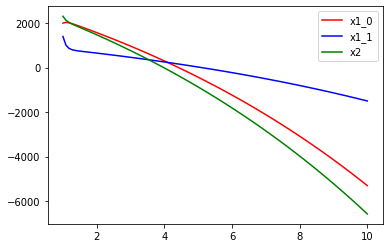

In [226]:
plt.plot(t, x1[0], 'r', t, x1[1], 'b', t, x2[0], 'g')
plt.legend(['x1_0', 'x1_1', 'x2'])
plt.show()

In [227]:
y1_0 = np.dot((np.eye(A1.shape[0]) - A1), x1_0)
y1_0

array([[-206.36363636],
       [ 611.81818182]])

In [228]:
def y_der(t, y):
    return np.dot(np.dot(np.eye(A1.shape[0]) - A1, B_inv), y) 

In [229]:
y1 = solve_ivp(y_der, [1, 10], [2000, 1400], t_eval=t).y

In [230]:
eigen_values, vector = np.linalg.eig(np.dot(A1_neg_inv, B))
tech_growth = 1.0 / np.max(eigen_values)
print(tech_growth)

X1_tech_growth = [[2000, 1400]]
st = np.exp(tech_growth * t)

0.08906536265780537


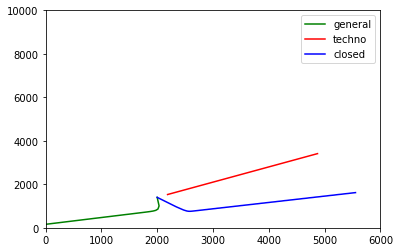

In [231]:
plt.plot(x1[0], x1[1], 'g',
        st*2000, st*1400, 'r',
        y1[0], y1[1], 'b')
plt.axis([0, 6000, 0, 10000])
plt.legend(['general', 'techno', 'closed'])
plt.show()